# ------ Import Modules ------

In [2]:
# import necessary modules
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas_profiling import ProfileReport
from helperFile import GetProviderCount, MachineLearning, data_types
from IPython.display import HTML, IFrame

# suppress warnings
warnings.filterwarnings('ignore')

# ------ Exploratory Data Analysis ------

## Load Data

In [13]:
# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# load data
claim_data = pd.read_csv(os.path.join('../data','original','claim_sample.tar.gz'), 
                         compression='gzip', 
                         dtype=data_types,
                         low_memory=False)

# drop first column
claim_data.drop('claim.sample.csv', axis=1, inplace=True)

# drop last row
claim_data.dropna(inplace=True)

# show last rows to ensure drop last row and first column
claim_data.tail()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
472554,895587990.0,17,98799627,FA0001389001,,636,OP7O,,,72930,265.7261,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472555,895587990.0,18,98799627,FA0001389001,,636,OP7O,,,72930,174.5706,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472556,895587990.0,19,98799627,FA0001389001,,260,IH7O,,,72930,317.2665,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472557,895587990.0,1,98799627,FA0001389001,,324,RA7O,,71020,V7283,358.0050,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472558,231056990.0,1,99975920,FA0001389001,,324,RA7O,,71020,78607,358.0050,,,,,,,0.0,0.0,48546,80984950,0,M,H,,2,,


In [14]:
# show claim data information
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Claim.Number               472559 non-null  float64
 1   Claim.Line.Number          472559 non-null  object 
 2   Member.ID                  472559 non-null  object 
 3   Provider.ID                472559 non-null  object 
 4   Line.Of.Business.ID        472559 non-null  object 
 5   Revenue.Code               472559 non-null  object 
 6   Service.Code               472559 non-null  object 
 7   Place.Of.Service.Code      472559 non-null  object 
 8   Procedure.Code             472559 non-null  object 
 9   Diagnosis.Code             472559 non-null  object 
 10  Claim.Charge.Amount        472559 non-null  float64
 11  Denial.Reason.Code         472559 non-null  object 
 12  Price.Index                472559 non-null  object 
 13  In.Out.Of.Network          47

In [15]:
# get the unique claims
averages = claim_data.groupby('Claim.Number')['Claim.Line.Number'].max()
average_lines_per_claim = np.average(averages.values.astype('int'))
f"The average lines per claim is {average_lines_per_claim}"

'The average lines per claim is 5.012449987230783'

In [16]:
# describe numeric columns
claim_data.describe()

,Claim.Number,Claim.Charge.Amount,Subscriber.Payment.Amount,Provider.Payment.Amount
count,4.725590e+05,472559.000000,472559.000000,472559.000000
mean,6.876433e+08,1684.487052,0.060524,299.664982
std,4.631736e+08,6516.274159,14.559293,2651.754216
min,1.899000e+04,-192496.200000,0.000000,0.000000
25%,2.554021e+08,141.831700,0.000000,0.000000
50%,6.453732e+08,327.142500,0.000000,0.000000
75%,1.060539e+09,1072.781000,0.000000,0.000000
max,1.541242e+09,756336.700000,7625.259600,491735.200000


In [17]:
# look at the claim with the lowest amount
claim_data.loc[claim_data['Claim.Charge.Amount'] == min(claim_data['Claim.Charge.Amount'])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466009,1.389507e+09,5,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466010,1.389507e+09,6,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [18]:
# look at all of the claim data
claim_data.iloc[466047:466054]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466047,1.389507e+09,1,94431843,FA0001774001,,278,AL7I,,,8052,195162.700,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466048,1.389507e+09,2,94431843,FA0001774001,,300,AL7I,,,8052,1380.171,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.200,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466050,1.389507e+09,4,94431843,FA0001774001,,300,AL7I,,,8052,-138.264,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466051,1.389507e+09,5,94431843,FA0001774001,,309,AL7I,,,8052,-1241.907,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466052,1.389507e+09,6,94431843,FA0001774001,,111,RB7I,,,8052,12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466053,1.389507e+09,7,94431843,FA0001774001,,111,RB7I,,,8052,-12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [19]:
# show the claim charge amounts 
claim_data['Claim.Charge.Amount'].value_counts(ascending=False)

84.56325       6480
0.00000        4598
118.51200      4480
123.45000      3386
248.13450      3014
               ... 
21735.84000       1
6623.83320        1
404.71848         1
554.78430         1
2433.17481        1
Name: Claim.Charge.Amount, Length: 40448, dtype: int64

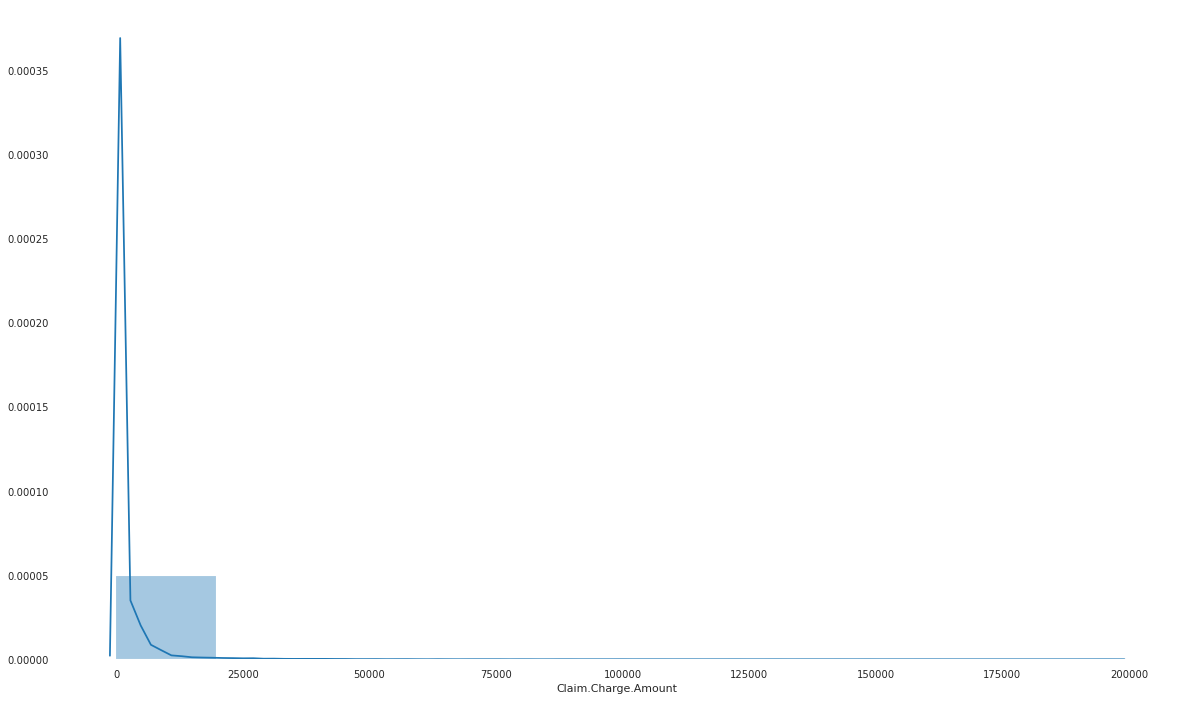

In [20]:
plt.figure(figsize=(20,12))
col = 'Claim.Charge.Amount'
claim_zero_200 = claim_data.loc[(claim_data[col] >= 0) &  (claim_data[col] <= 200000), col]
sns.distplot(claim_zero_200, bins=10);

In [21]:
# get procedure claims and add them to a list
IsProcedure = [ 1 if proc.startswith('J') else 0 for proc in claim_data['Procedure.Code']]

# add list as a new column to the dataframe
claim_data['IsProcedure'] = IsProcedure

# show a sample of the data
claim_data.loc[claim_data.IsProcedure == 1].head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,IsProcedure
3073,74645490.0,10,1992052,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613650,0,M,H,S,91,P00000000001,FH001309QB01,1
3091,18860690.0,8,22808129,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3092,18860690.0,9,22808129,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3103,281757390.0,10,1997607,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114,1618150,0,M,H,S,91,P00000000001,FH001309QB01,1
3114,450273590.0,10,1991496,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613200,0,M,H,S,2,P00000000001,FH001309QB01,1


# ------ Question 1 (Procedure Analysis) ------

## Part A (Find the number of claim lines that have J-codes)

In [22]:
claims_with_procedures = claim_data.loc[claim_data.IsProcedure == 1, 'Claim.Number']
f"The number of unique claims with procedures is {len(np.unique(claims_with_procedures))}"

'The number of unique claims with procedures is 10691'

## Part B (How much was paid to providers for In Network Claims?)

In [23]:
from babel.numbers import format_currency
in_network_claims_with_procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
                                                    & (claim_data['In.Out.Of.Network'] == 'I'), 'Provider.Payment.Amount']
paid_amount = round(np.sum(in_network_claims_with_procedures),2)
f"The sum of payments made to providers for in-network procedures is {format_currency(paid_amount, 'USD', locale='en_US')}"


'The sum of payments made to providers for in-network procedures is $2,417,220.96'

## Part C (What are the top five J-codes based on the payment to providers?)


In [24]:
claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code'].value_counts(ascending=False).head()

J2405    540
J2501    457
J7030    387
J1170    363
J1644    301
Name: Procedure.Code, dtype: int64

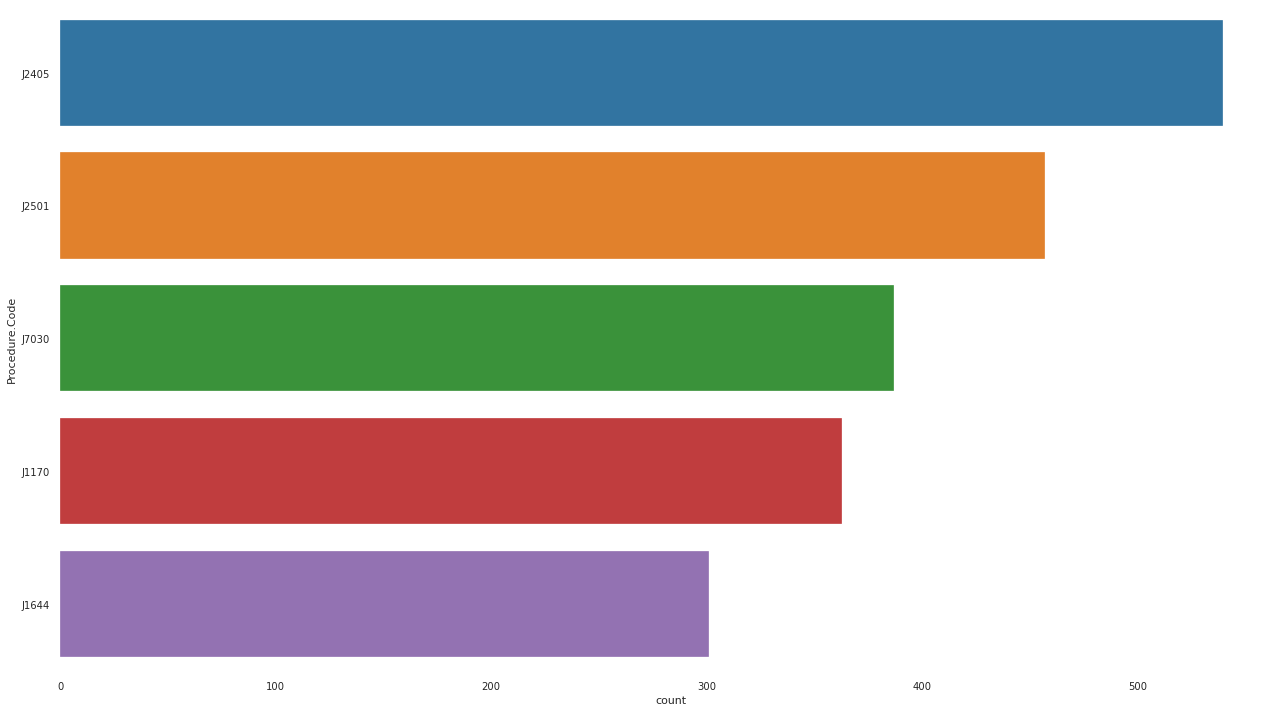

In [25]:
plt.figure(figsize=(18,10))
procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code']
sns.countplot(y=procedures, order=procedures.value_counts().iloc[:5].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"PaidProcedures_barchart.png"))

# ------ Question 2 (Provider Analysis) ------

## Scatter plot analysis of paid versus unpaid claims

In [26]:
# get providers with at least one paid claim
providers_with_paid_claims = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Provider.ID']
providers = list(set(providers_with_paid_claims))
provider_claims = [1 if prov in providers else 0 for prov in claim_data['Provider.ID']]



In [27]:
# get upaid claim data and put it into the claim dataframe
unpaid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] == 0), 'Claim.Number'].index
unpaid_claims = np.zeros(len(claim_data))
unpaid_claims[unpaid_claim_data] = 1
claim_data['UnpaidClaim'] = unpaid_claims
claim_data['UnpaidClaim']  = claim_data['UnpaidClaim'].astype(int)

In [28]:
# get paid procedure claim data and put it into the claim dataframe
paid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Claim.Number'].index
paid_claims = np.zeros(len(claim_data))
paid_claims[paid_claim_data] = 1
claim_data['PaidClaim'] = paid_claims
claim_data['PaidClaim']  = claim_data['PaidClaim'].astype(int)

In [29]:
# produce unpaid and paid claim count by provider and load into a dataframe
provider_data = [GetProviderCount(claim_data, provider) for provider in providers]
provider_df = pd.DataFrame(provider_data, columns=['ProviderID','PaidCount','UnPaidCount'])

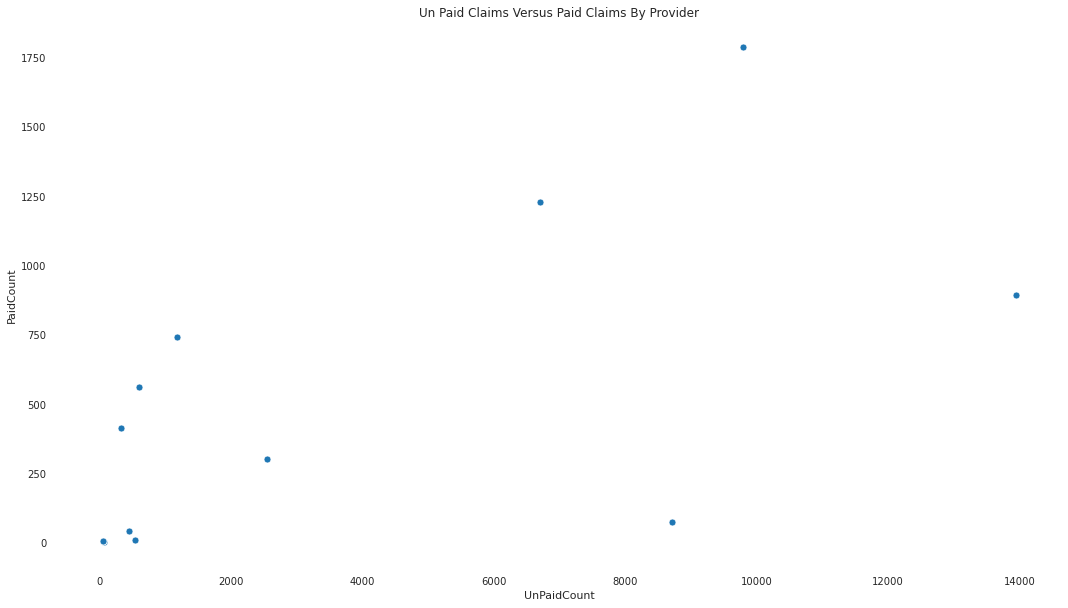

In [30]:
plt.figure(figsize=(18,10))
plt.title("Un Paid Claims Versus Paid Claims By Provider")
ax = sns.scatterplot(x='UnPaidCount', y="PaidCount", data=provider_df)
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Scatterplot.png"))

## Graph Analysis and Concerns

As the numbers have stated, the provider paid percentage average is 17.69 while the average unpaid percentage is 82.31 which means that on overage healthcare organization are missing 82.31 of potential revenue. Providers have a paid percentage of anywhere between 1 to 56 percent. I would want to understand how this data relates to time as most claims are not paid until the end of the month. I would also want to understand why there is a wide discrepancy between provider paid percentages.  There is a strong positive correlation between the two variables (Paid Versus Unpaid Counts).


# ------ Question 3 (Data Analysis) ------ 

## Provider Paid Versus Unpaid Grid

In [31]:
# show paid versus upaid claim information with percentages
provider_df['Total Claims'] = provider_df['PaidCount'] + provider_df['UnPaidCount']
provider_df['Paid Percentage'] = (provider_df['PaidCount'] / provider_df['Total Claims']) * 100
provider_df['UnPaid Percentage'] = 100 - provider_df['Paid Percentage']
provider_df

,ProviderID,PaidCount,UnPaidCount,Total Claims,Paid Percentage,UnPaid Percentage
0,FA1000015002,43,449,492,8.739837,91.260163
1,FA0001411003,4,67,71,5.633803,94.366197
2,FA0004551001,415,322,737,56.309362,43.690638
3,FA0001774001,302,2545,2847,10.607657,89.392343
4,FA0001389003,8,539,547,1.462523,98.537477
5,FA1000015001,740,1170,1910,38.743455,61.256545
6,FA0001387002,1786,9799,11585,15.416487,84.583513
7,FA1000014002,5,49,54,9.259259,90.740741
8,FA1000016001,7,46,53,13.207547,86.792453
9,FA0001387001,74,8710,8784,0.842441,99.157559


## Paid Versus Unpaid Percentage Numbers

In [32]:
# get the unpaid and paid percentages
average_paid_percentage = np.average(provider_df['Paid Percentage'])
average_unpaid_percentage = np.average(provider_df['UnPaid Percentage'])
f"The average paid percentage is {average_paid_percentage} while the unpaid percentage is {average_unpaid_percentage}"

'The average paid percentage is 17.693456299234207 while the unpaid percentage is 82.3065437007658'

## Provider Paid Percentages (Grouped Bar Chart)

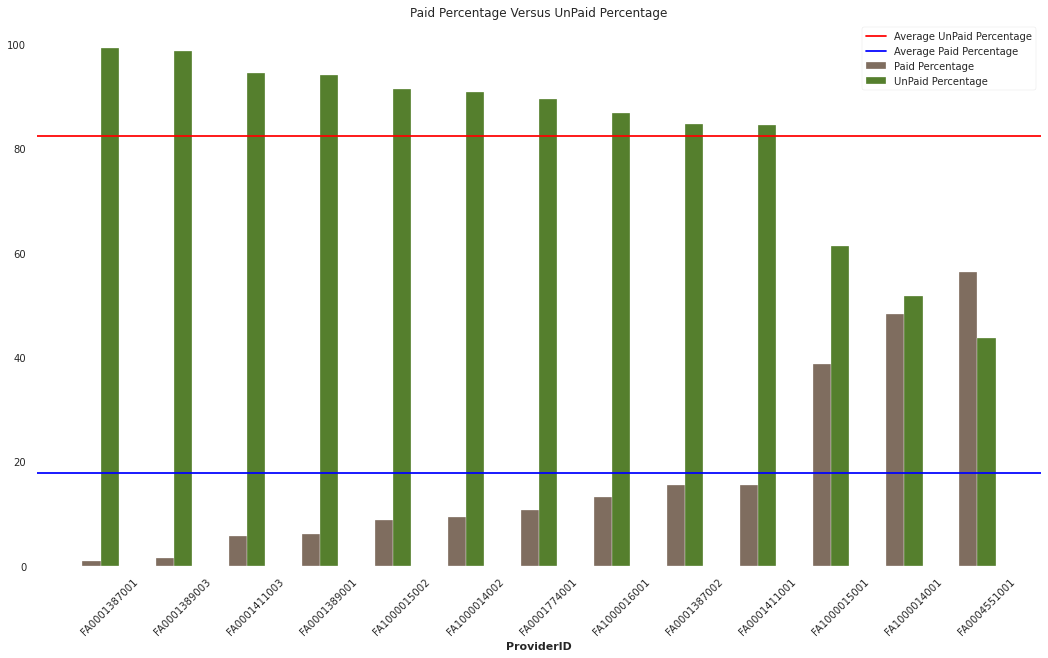

In [33]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25

# sort values before starting
provider_df = provider_df.sort_values('UnPaid Percentage', ascending=False)

# set height of bar
bars1 = provider_df['Paid Percentage'].values
bars2 = provider_df['UnPaid Percentage'].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# set figure size
plt.figure(figsize=(18,10))
plt.title("Paid Percentage Versus UnPaid Percentage")

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Paid Percentage')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='UnPaid Percentage')
 
# Add xticks on the middle of the group bars
plt.xlabel('ProviderID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], provider_df['ProviderID'].values, rotation=45)
 
# Add a static line for the average paid and unpaid amount
plt.axhline(average_unpaid_percentage, color='r', label='Average UnPaid Percentage')
plt.axhline(average_paid_percentage, color='b', label='Average Paid Percentage')

# Create legend & Show graphic
plt.legend()

# Save File
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Percentage.png"))

# Show Image
plt.show()




## Data Prep

In [47]:
# load procedure data including new columns 
procedure_data = claim_data.loc[claim_data.IsProcedure == 1].copy()

# delete claim data from memory
del claim_data

# drop unneccessary columns (IsProcedure and Paid Claim)
procedure_data.drop(['IsProcedure', 'PaidClaim'], axis=1, inplace=True)

# convert claim number to an integer value
procedure_data['Claim.Number'] = procedure_data['Claim.Number'].astype(int)


NameError: name 'claim_data' is not defined

## Balance Dataset

## Save Data To File

In [48]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = procedure_data[procedure_data.UnpaidClaim==1]
df_minority = procedure_data[procedure_data.UnpaidClaim==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.UnpaidClaim.value_counts()

# Save Data To File
df_downsampled.to_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), compression='gzip', index=False)

## Examine Procedure Data Set

In [3]:
# load data
procedure_data = pd.read_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), low_memory=False)

# show first few rows
procedure_data.head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,...,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,120447590,7,17159858,FA0001389001,1,636,SU7A,,J3010,78791,...,110,13900250,0,M,H,,2,P00000000007,FH001309QB01,1
1,997645990,14,329796,FA0001774001,1,636,OP7O,,J1650,78651,...,61,267150,75,M,H,,2,P00000000001,FH000595QB01,1
2,551558490,12,40200445,FA0001389001,1,636,SU7A,,J2765,6851,...,572,32564150,0,M,H,,2,P00000000007,FH002454QPD1,1
3,346912290,12,30203585,FA0001389001,1,636,SU7A,,J3010,84201,...,572,24466250,0,M,H,,2,P00000000007,FH002454QPD1,1
4,325425390,15,39116739,FA0001411001,1,636,SU7A,,J2250,2189,...,572,31686300,0,M,H,,2,P00000000007,FH002451QPD1,1


### Data Overview

51029 procedures
10691 unique procedure claims
6341 unique patients
Top Procedures for Member (88514637.0, 306)
mostly end stage renal cancer patients
top 5 injections are for prepping the patient for infusion (anethesia)
healthcare claim code reference (https://www.uhccommunityplan.com/assets/healthcareprofessionals/providerinformation/AZ-Provider-Information/AZ_Health_Care_Status_Codes.pdf)


In [4]:
procedure_data.shape

(12136, 29)

In [5]:
procedure_data['Member.ID'].nunique()

3391

In [6]:
procedure_data['Member.ID'].value_counts(ascending=False).head()

1554235     135
25335026     82
21880031     80
37800513     73
94627634     72
Name: Member.ID, dtype: int64

In [7]:
# J1644 == Injection, heparin sodium, per 1000 units
procedure_data.loc[procedure_data['Member.ID'] == 88514637.0]                  

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,...,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
453,115273290,19,88514637,FA1000015001,13,636,OP7O,,J1644,5856,...,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
508,1003542990,14,88514637,FA0001387001,,636,OP7O,,J1644,5856,...,48546,71700800,0,M,H,,2,,,1
572,115282190,35,88514637,FA1000015001,13,636,OP7O,,J2501,5856,...,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
721,1003542990,99,88514637,FA0001387001,,636,OP7O,,J2501,5856,...,48546,71700800,0,M,H,,2,,,1
775,115282190,4,88514637,FA1000015001,13,636,OP7O,,J1644,5856,...,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
1136,115282190,39,88514637,FA1000015001,13,636,OP7O,,J2501,5856,...,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
1259,1003542990,41,88514637,FA0001387001,,636,OP7O,,J2501,5856,...,48546,71700800,0,M,H,,2,,,1
1327,1003542990,101,88514637,FA0001387001,,636,OP7O,,J2501,5856,...,48546,71700800,0,M,H,,2,,,1
1385,1003542990,22,88514637,FA0001387001,,636,OP7O,,J1644,5856,...,48546,71700800,0,M,H,,2,,,1
1434,1003542990,35,88514637,FA0001387001,,636,OP7O,,J1644,5856,...,48546,71700800,0,M,H,,2,,,1


### UnPaid Claim

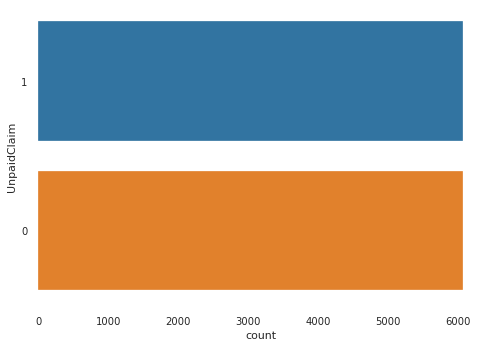

In [8]:
# look at values counts for the target
col = 'UnpaidClaim'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [9]:
procedure_data[col].value_counts()

1    6068
0    6068
Name: UnpaidClaim, dtype: int64

### Line.Of.Business.ID

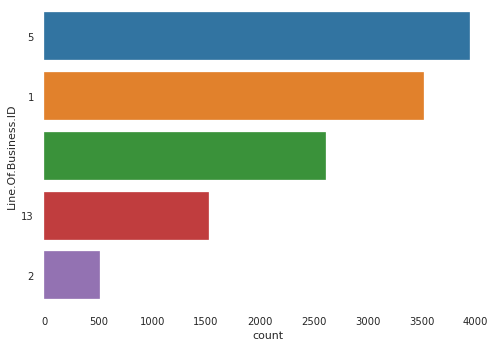

In [10]:
# look at line of business for procedure claims
col = 'Line.Of.Business.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [11]:
procedure_data[col].value_counts()

5     3946
1     3526
      2614
13    1530
2      519
7        1
Name: Line.Of.Business.ID, dtype: int64

### Revenue.Code

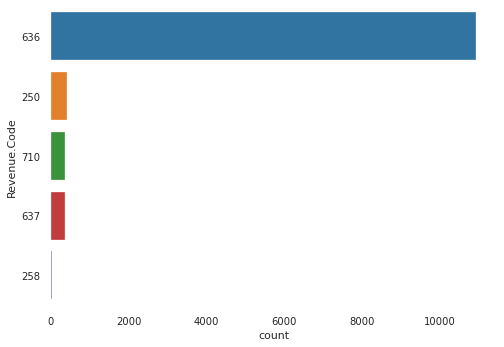

In [12]:
# look at line of business for procedure claims
# 636 drugs requiring detailed coding
# 637 self administrable drugs
# 710 general recovery room
# 250 pharmacy general
# 258 iv solutions
# https://med.noridianmedicare.com/web/jea/topics/claim-submission/revenue-codes
col = 'Revenue.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [13]:
procedure_data[col].value_counts()

636    10939
250      419
710      368
637      365
258       27
259       16
490        1
450        1
Name: Revenue.Code, dtype: int64

### Service.Code

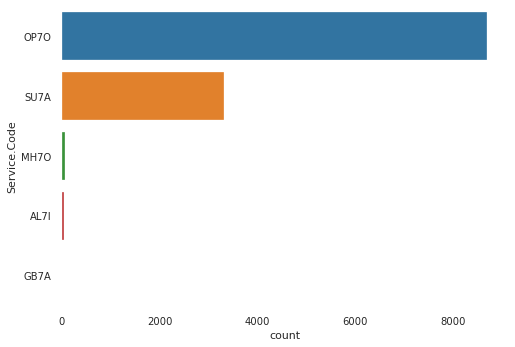

In [14]:
# look at line of business for procedure claims
# op70 collections and bad debt
# 
col = 'Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [15]:
procedure_data[col].value_counts()

OP7O    8695
SU7A    3307
MH7O      71
AL7I      42
GB7A       9
           7
SA7A       4
ER7O       1
Name: Service.Code, dtype: int64

### Place.Of.Service.Code

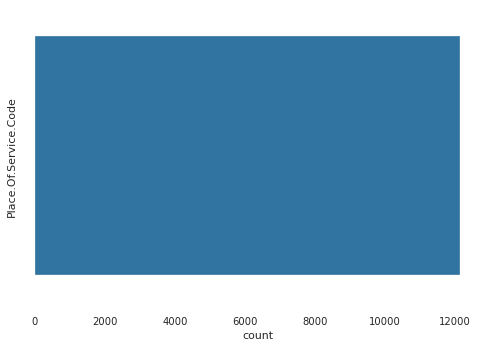

In [16]:
# look at line of business for procedure claims
col = 'Place.Of.Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [17]:
procedure_data[col].value_counts()

     12136
Name: Place.Of.Service.Code, dtype: int64

### Diagnosis.Code

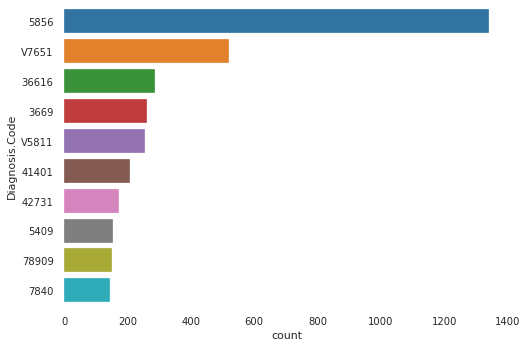

In [18]:
# 585.6 == End Stage Renal Disease
# v765.1 == Special screening for malignant neoplasms of colon
# 366.16 == Senile nuclear sclerosis (cataracts)
# 366.9 == cataract
# 414.01 == Coronary atherosclerosis of native coronary artery
# 427.31 == Atrial fibrillation
# 574.10 == Calculus of gallbladder with other cholecystitis, without mention of obstruction
# 540.9 == Other acute appendicitis
# 55090 == Inguinal hernia, without mention of obstruction or gangrene, unilateral or unspecified (not specified as recurrent)
# 592.1 == Calculus of ureter

# look at Diagnosis.Code for procedure claims
col = 'Diagnosis.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [19]:
procedure_data[col].value_counts()

5856     1341
V7651     520
36616     286
3669      261
V5811     256
         ... 
463         1
1419        1
46619       1
42833       1
61189       1
Name: Diagnosis.Code, Length: 1081, dtype: int64

### Claim.Charge.Amount

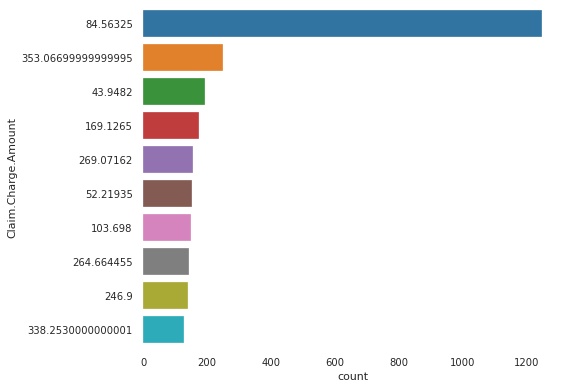

In [20]:
# look at charge amounts
col = 'Claim.Charge.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [21]:
procedure_data[col].value_counts()

84.563250     1246
353.067000     249
43.948200      193
169.126500     175
269.071620     155
              ... 
201.667900       1
189.582165       1
295.687440       1
520.959000       1
396.027600       1
Name: Claim.Charge.Amount, Length: 1823, dtype: int64

### Denial.Reason.Code

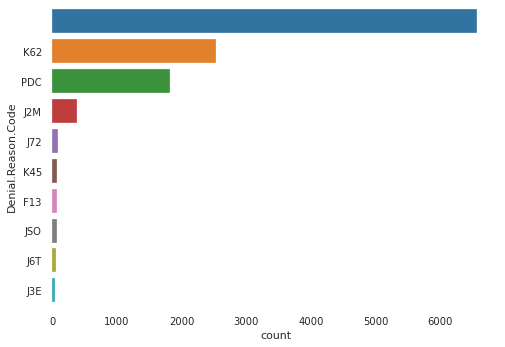

In [22]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
col = 'Denial.Reason.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [23]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
procedure_data[col].value_counts()

       6577
K62    2538
PDC    1819
J2M     381
J72      91
       ... 
TR2       1
KJW       1
S1C       1
JD3       1
JO5       1
Name: Denial.Reason.Code, Length: 71, dtype: int64

### Price.Index

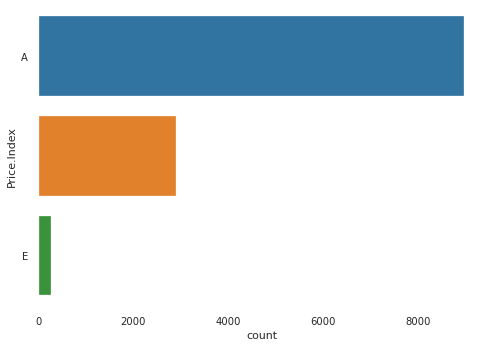

In [24]:
# look at priced index
col = 'Price.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [25]:
procedure_data[col].value_counts().iloc[:10]

A    8968
     2909
E     259
Name: Price.Index, dtype: int64

### In.Out.Of.Network

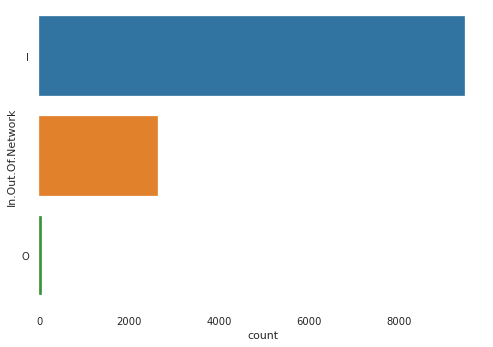

In [26]:
# look at in versus out of network
col = 'In.Out.Of.Network'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [27]:
procedure_data[col].value_counts().iloc[:10]

I    9446
     2623
O      67
Name: In.Out.Of.Network, dtype: int64

### Reference.Index

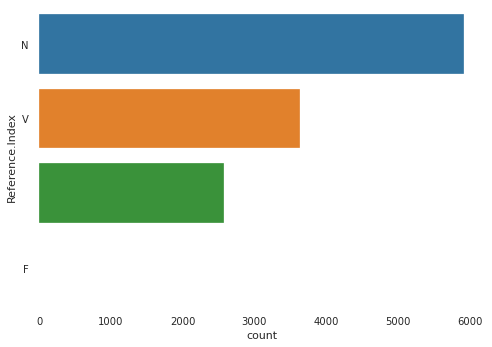

In [28]:
col = 'Reference.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [29]:
# look at reference index
col = 'Reference.Index'
procedure_data[col].value_counts(ascending=False).head(10)

N    5928
V    3633
     2572
F       3
Name: Reference.Index, dtype: int64

### Pricing.Index

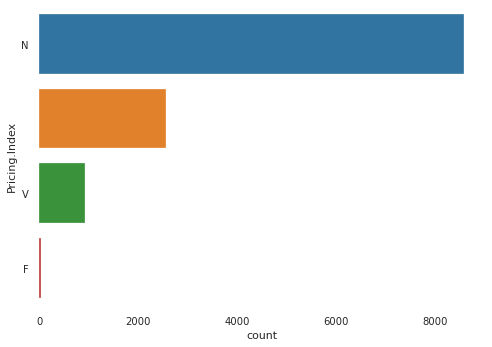

In [30]:
col = 'Pricing.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [31]:
# look at pricing index
procedure_data[col].value_counts(ascending=False).head(10)

N    8595
     2572
V     930
F      39
Name: Pricing.Index, dtype: int64

### Capitation.Index

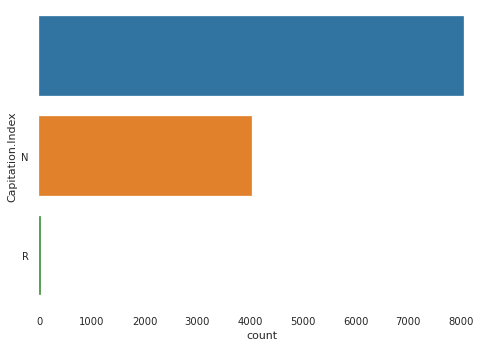

In [32]:
col = 'Capitation.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [33]:
# look at capitation index
procedure_data[col].value_counts(ascending=False).head(10)

     8064
N    4031
R      41
Name: Capitation.Index, dtype: int64

### Subscriber.Payment.Amount

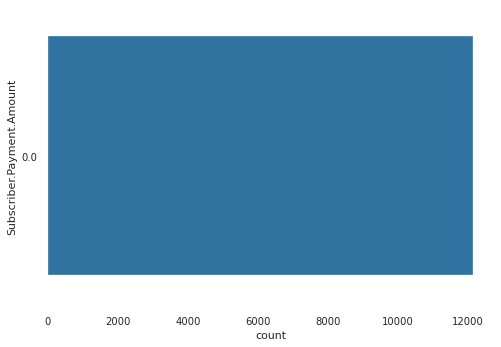

In [34]:
col = 'Subscriber.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [35]:
# look at subscriber payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.0    12136
Name: Subscriber.Payment.Amount, dtype: int64

### Provider.Payment.Amount

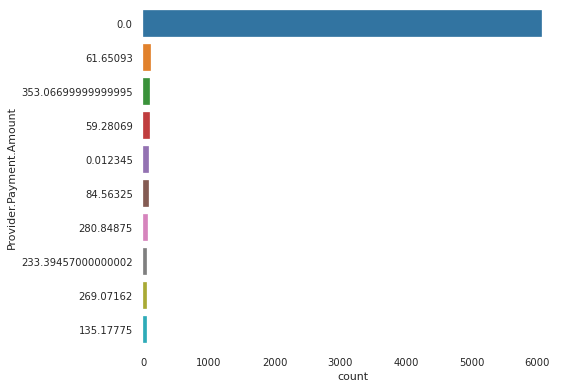

In [36]:
col ='Provider.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [37]:
# look at provider payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.000000      6068
61.650930      113
353.067000     100
59.280690       96
0.012345        86
84.563250       79
280.848750      72
233.394570      60
269.071620      59
135.177750      57
Name: Provider.Payment.Amount, dtype: int64

### Group.Index

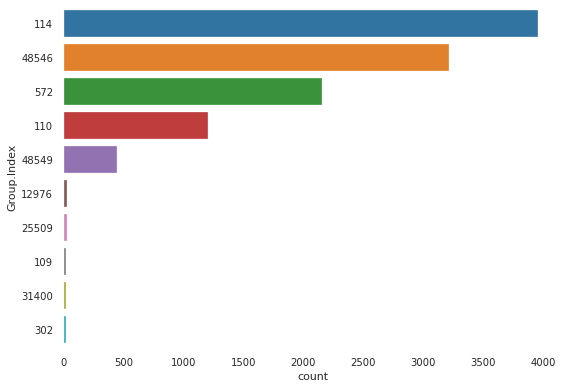

In [38]:
col ='Group.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [39]:
# look at group index
procedure_data[col].value_counts(ascending=False).head(10)

114      3956
48546    3215
572      2158
110      1201
48549     445
12976      30
25509      27
109        24
31400      24
302        20
Name: Group.Index, dtype: int64

### Subscriber.Index

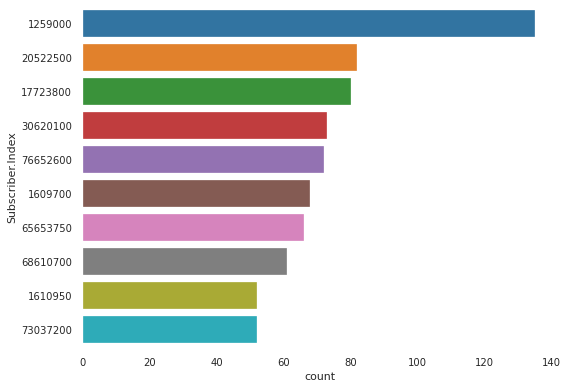

In [40]:
col ='Subscriber.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [41]:
# look at subscriber index
procedure_data[col].value_counts(ascending=False).head(10)

1259000     135
20522500     82
17723800     80
30620100     73
76652600     72
1609700      68
65653750     66
68610700     61
1610950      52
73037200     52
Name: Subscriber.Index, dtype: int64

### Subgroup.Index

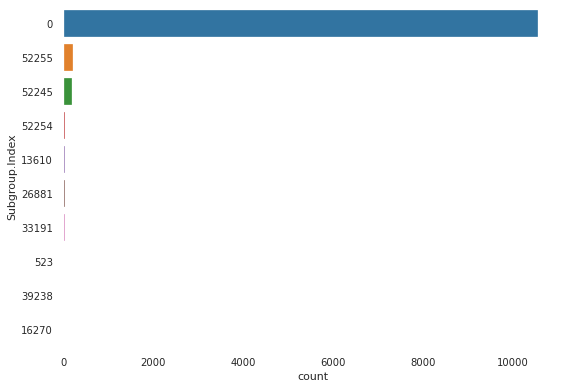

In [42]:
col = 'Subgroup.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [43]:
# look at sub-group index
procedure_data[col].value_counts(ascending=False).head(10)

0        10559
52255      217
52245      182
52254       41
13610       30
26881       27
33191       24
523         20
39238       18
16270       15
Name: Subgroup.Index, dtype: int64

### Claim.Type

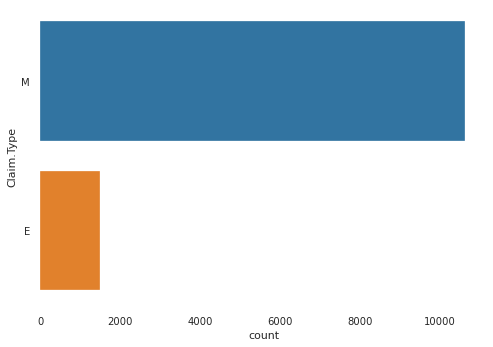

In [44]:
col = 'Claim.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [45]:
# look at claim type
procedure_data[col].value_counts(ascending=False).head(10)

M    10632
E     1504
Name: Claim.Type, dtype: int64

### Claim.Subscriber.Type

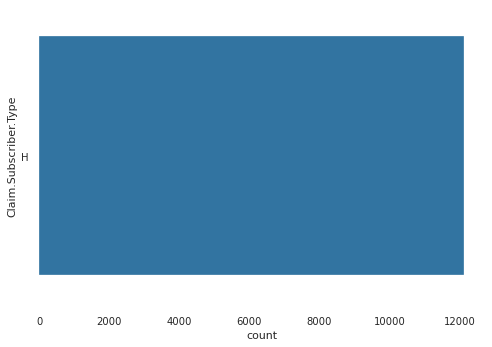

In [46]:
col = 'Claim.Subscriber.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [47]:
# look at subsriber type
procedure_data[col].value_counts(ascending=False).head(10)

H    12136
Name: Claim.Subscriber.Type, dtype: int64

### Claim.Pre.Prince.Index

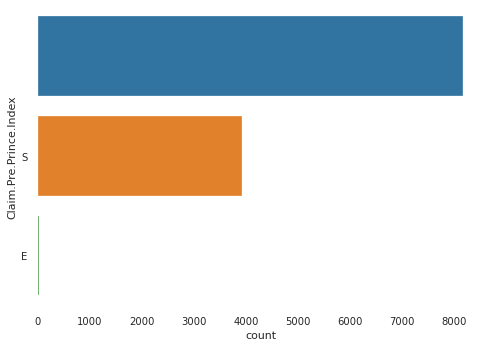

In [48]:
col = 'Claim.Pre.Prince.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [49]:
# look at claim pre price index
procedure_data[col].value_counts(ascending=False).head(10)

     8180
S    3935
E      21
Name: Claim.Pre.Prince.Index, dtype: int64

### Claim.Current.Status

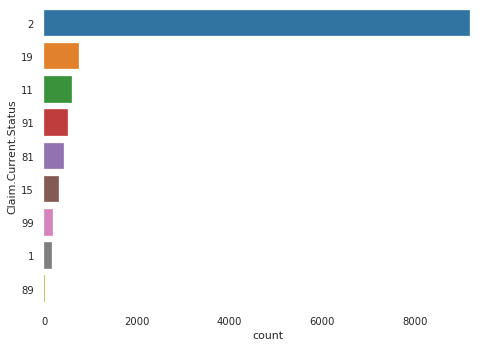

In [50]:
col = 'Claim.Current.Status'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [51]:
# look at claim current status
procedure_data[col].value_counts(ascending=False).head(10)

2     9186
19     739
11     586
91     518
81     429
15     308
99     190
1      170
89      10
Name: Claim.Current.Status, dtype: int64

### Network.ID

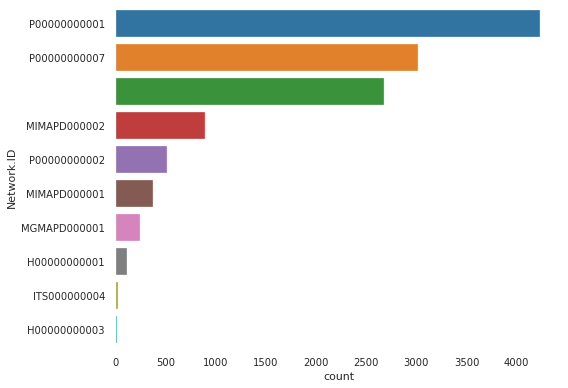

In [52]:
col = 'Network.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [53]:
# network id
procedure_data[col].value_counts(ascending=False).head(20)

P00000000001    4236
P00000000007    3020
                2679
MIMAPD000002     888
P00000000002     516
MIMAPD000001     376
MGMAPD000001     244
H00000000001     113
ITS000000004      29
H00000000003      13
H00000000002      11
P00000000003       5
H00000000004       4
H00000000011       1
P00000000009       1
Name: Network.ID, dtype: int64

### Agreement.ID

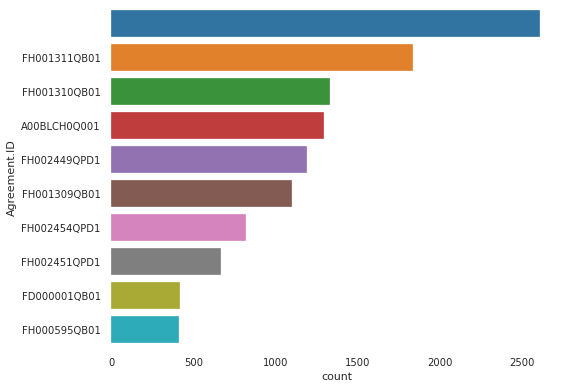

In [54]:
col = 'Agreement.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [55]:
# agreement id
procedure_data[col].value_counts(ascending=False).head(10)

                2612
FH001311QB01    1840
FH001310QB01    1334
A00BLCH0Q001    1296
FH002449QPD1    1189
FH001309QB01    1101
FH002454QPD1     818
FH002451QPD1     666
FD000001QB01     421
FH000595QB01     413
Name: Agreement.ID, dtype: int64

## Data Profile

In [57]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import os

produce_report = True

if produce_report:
    # produce profile report
    profile = ProfileReport(procedure_data, title="Procedure Data Report", minimal=True);

    # show profile in notebook
    profile.to_widgets();
    
    # save profile to visalizations folder
    profile.to_file(os.path.join('../visualization','Procedure_Data_Report.html'))


In [58]:
# show saved report
IFrame(src=os.path.join('../visualization','Procedure_Data_Report.html'), width=950, height=400)

## Drop Columns after EDA

In [59]:
# drop columns ['Claim.Subscriber.Type', Subscriber.Payment.Amount', 'Place.Of.Service.Code']
procedure_data.drop(['Claim.Number', 'Claim.Line.Number', 'Member.ID',
                     'Claim.Subscriber.Type', 'Subscriber.Payment.Amount', 
                     'Place.Of.Service.Code', 'Denial.Reason.Code', 'Service.Code',
                     'In.Out.Of.Network', 'Capitation.Index', 'Subgroup.Index'], inplace=True, axis=1)

# replace blank values with NaN
procedure_data = procedure_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

# add cleaned file to cleaned folder
procedure_data.to_csv(os.path.join('../data','cleaned','procedure_data.tar.gz'), compression='gzip', index=False)

In [60]:
# make sure columsn are removed
procedure_data.head()

,Provider.ID,Line.Of.Business.ID,Revenue.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Price.Index,Reference.Index,Pricing.Index,Provider.Payment.Amount,Group.Index,Subscriber.Index,Claim.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,FA0001389001,1,636,J3010,78791,78.477165,A,V,V,0.0,110,13900250,M,NaN,2,P00000000007,FH001309QB01,1
1,FA0001774001,1,636,J1650,78651,1580.406900,A,V,V,0.0,61,267150,M,NaN,2,P00000000001,FH000595QB01,1
2,FA0001389001,1,636,J2765,6851,190.446315,A,V,N,0.0,572,32564150,M,NaN,2,P00000000007,FH002454QPD1,1
3,FA0001389001,1,636,J3010,84201,96.414450,A,V,V,0.0,572,24466250,M,NaN,2,P00000000007,FH002454QPD1,1
4,FA0001411001,1,636,J2250,2189,62.403980,A,V,N,0.0,572,31686300,M,NaN,2,P00000000007,FH002451QPD1,1


# ------ Create Models ------

## Base Line Model (Logistic Regression)

In [1]:
from helperFile import MachineLearning
import os

# store name to be use in results
model = 'LogisticRegression'

machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)

# set up pre-processing
preprocessing = machine_learning.PreProcessing()

# perform logistic regression
# print out mean squared error and accuracy
mse, score = machine_learning.LogisticRegression()

print(f"The mean squared error is {mse} and accuracy is {score}")

The mean squared error is 0.10461922596754057 and accuracy is 0.8953807740324594


## Random Forest Classifier Tuning

In [2]:
from helperFile import MachineLearning, random_tune
import os

# store name to be use in results
model = 'RandomForest'

machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)

# set up pre-processing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in random_tune.items():
    # loop through each 
    for value in values:
        
        # set parameter and value to tune
        parameter = { key : value }
        
        # perform random forst
        score = machine_learning.RandomForest(parameter_dict=parameter, regressor=False)
        
        results.append((key, value, score))

/home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/narquette/anaconda/envs/claims/lib/python3

### Show best results

In [3]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in random_tune.keys():
    
    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]
    
# print out results
print(best_results_dict)

{'max_depth': 100, 'n_estimators': 70, 'max_features': None, 'min_samples_leaf': 1}


### Final, Tuned, Random Forest

In [4]:
import os
from helperFile import MachineLearning

# store name to be use in results
model = 'RandomForest'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# set best_results_dict
best_results_dict = {'max_depth': 100, 'n_estimators': 70, 'max_features': None, 'min_samples_leaf': 1}

# perform random forest using best parameters
mse, score = machine_learning.RandomForest(regressor=False, parameter_dict=best_results_dict)

# print final model score
print(f"The mean squared error is {mse} and accuracy is {score}")

The mean squared error is 0.10936329588014981 and accuracy is 0.8906367041198502


## XgBoost Tuning

In [5]:
# import tuneing parameters
import os
from helperFile import MachineLearning, xgb_tune

# set model name
model = 'XGBoost'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)

# perform pre-processing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in xgb_tune.items():
    # loop through each
    for value in values:

        # set parameter and value to tune
        parameter = {key: value}

        # perform random forst
        score = machine_learning.XGboost(regressor=False, parameter_dict=parameter)

        results.append((key, value, score))

[11:01:22] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:24] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:44] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




### Show best results

In [6]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in xgb_tune.keys():

    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]

# print out results
print(best_results_dict)

{'learning_rate': 0.8, 'max_depth': 20, 'n_estimators': 100}


### Final, Tuned, XgBoost

In [7]:
import os
from helperFile import MachineLearning
import xgboost as xgb

# set model name
model = 'XGBoost' 

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)
 
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# # set best_results_dict
best_results_dict = {'learning_rate': 0.8, 'max_depth': 20, 'n_estimators': 100}

# # perform random forest using best parameters
mse, score = machine_learning.XGboost(regressor=False, parameter_dict=best_results_dict)
        
# # print final model score
print(mse, score)

[11:01:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.09113607990012484 0.9088639200998752


## LgBoost Tuning

In [8]:
# import tuneing parameters
import os
from helperFile import MachineLearning, lgb_tune

# set model name
model = 'LGBoost'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)
 
# set columns for preprocessing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in lgb_tune.items():
    # loop through each 
    for value in values:
        
        # set parameter and value to tune
        parameter = { key : value }
        
        # perform random forst
        score = machine_learning.LGboost(regressor=False, parameter_dict=parameter)
        
        results.append((key, value, score))

### Show best results

In [9]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in lgb_tune.keys():

    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]

# print out results
print(best_results_dict)

{'learning_rate': 0.6, 'max_depth': 15, 'num_leaves': 2020, 'n_estimators': 100, 'min_data_in_leaf': 100}


### Final, Tuned, LgBoost

In [10]:
import os
from helperFile import MachineLearning
import xgboost as xgb

# set model name
model = 'LGBoost' 

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"),
                                   imbalance=True)
 
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# # set best_results_dict
best_results_dict = {'learning_rate': 0.6, 'max_depth': 15, 'num_leaves': 2020, 'n_estimators': 100, 'min_data_in_leaf': 100}

# # perform random forest using best parameters
score, mse = machine_learning.LGboost(regressor=False, parameter_dict=best_results_dict)
        
# # print final model score
print(score, mse)

0.12034956304619226 0.8796504369538077


# ------ Test Models ------

## Logistic Regression Cross Validation

In [1]:
# do 5-fold cross validation on models and measure MSE
import os
import numpy as np
from helperFile import MachineLearning

# store name to be use in results
model = 'LogisticRegression'

# store results for all models
cv_results = {}

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"),
                                   imbalance=True)

# setup pre processing
preprocessing=machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.LogisticRegression(cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## Random Forest Cross Validation

In [2]:
import os
import numpy as np
from helperFile import MachineLearning, randomforest_best_results_dict

# store name to be use in results
model = 'RandomForest'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"),
                                   imbalance=True)

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.RandomForest(
    parameter_dict=randomforest_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## XgBoost Forest Cross Validation

In [3]:
import os
import numpy as np
from helperFile import MachineLearning, xgb_best_results_dict

# store name to be use in results
model = 'XGboost'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"),
                                   imbalance=True)

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.XGboost(
    parameter_dict=xgb_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

[12:08:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:08:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:08:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


## LgBoost Forest Cross Validation

In [4]:
import os
import numpy as np
from helperFile import MachineLearning, lgb_best_results_dict

# store name to be use in results
model = 'LGboost'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"),
                                   imbalance=True)

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.LGboost(
    parameter_dict=lgb_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## Show model results

In [5]:
import pandas as pd
model_dataframe = pd.DataFrame()
model_dataframe['Model'] = cv_results.keys()
model_dataframe['MeanSquaredError'] = [v[0] for v in cv_results.values()]
model_dataframe['Accuracy'] = [v[1] for v in cv_results.values()]
model_dataframe

,Model,MeanSquaredError,Accuracy
0,LogisticRegression,0.214668,0.785332
1,RandomForest,0.098063,0.901937
2,XGboost,0.099712,0.900288
3,LGboost,0.112485,0.887515


## Save results to file

In [6]:
# write dataframe to file
model_dataframe.to_csv(os.path.join('../logs','FinalResults.csv'), index=False)

## Select best model

In [7]:
#select the model with the lowest error as your "production" model
import pandas as pd
import os 

model_dataframe = pd.read_csv(os.path.join('../logs', 'FinalResults.csv'), low_memory=False)
best_model = model_dataframe.loc[model_dataframe['MeanSquaredError'] == min(model_dataframe['MeanSquaredError'])]
best_model

,Model,MeanSquaredError,Accuracy
1,RandomForest,0.098063,0.901937


## Save Final Model

In [38]:
import os
import numpy as np
from helperFile import MachineLearning, randomforest_best_results_dict, xgb_best_results_dict, lgb_best_results_dict

# store name to be use in results
model = best_model['Model'].to_string(index=False).strip()

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_FinalModel"),
                                   imbalance=True)

# setup pre processing
preprocessing = machine_learning.PreProcessing()

if model == 'LogisticRegression':
    machine_learning.LogisticRegression(save_model=True)
elif model == 'RandomForest':
    machine_learning.RandomForest(
        parameter_dict=randomforest_best_results_dict, regressor=False, save_model=True)
elif model == 'XGboost':
    machine_learning.XGboost(parameter_dict=xgb_best_results_dict, regressor=False, save_model=True)
elif model == 'LGboost':
    machine_learning.LGboost(parameter_dict=lgb_best_results_dict, regressor=False, save_model=True)
else:
    print(f'{model} not found')

## Feature Importance for Best Model

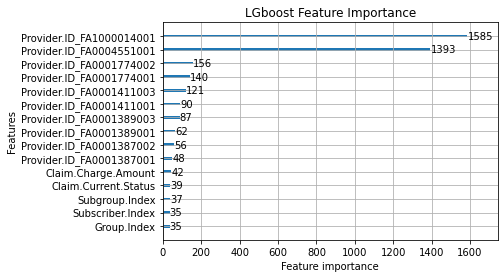

In [39]:
from helperFile import FeatureImportance

# store name to be use in results
model_name = best_model['Model'].to_string(index=False).strip()

# plot feature importance for the best model
FeatureImportance(model=model_name);



## h2o Auto ML

In [100]:
import h2o
import os
from h2o.automl import H2OAutoML

# initiate h2o
h2o.init()

# Import claims data (same split used in above modeling) set into H2O
train = h2o.import_file(os.path.join('../data', 'train_test_split', 'procedure_train_data.csv'))
test = h2o.import_file(os.path.join('../data', 'train_test_split', 'procedure_test_data.csv'))

# Identify predictors and response
x = train.columns
y = "UnpaidClaim"
x.remove(y)

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# Exclude Stacked Ensemble models as they will not include Feature Importance
aml = H2OAutoML(max_models=20, seed=1, exclude_algos=['StackedEnsemble'])
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-3ubuntu1); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-3ubuntu1, mixed mode, sharing)
  Starting server from /home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2akvx_8q
  JVM stdout: /tmp/tmp2akvx_8q/h2o_narquette_started_from_python.out
  JVM stderr: /tmp/tmp2akvx_8q/h2o_narquette_started_from_python.err
  Server is running at http://127.0.0.1:54361
Connecting to H2O server at http://127.0.0.1:54361 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_narquette_i6mf3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.971 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_1_AutoML_20200717_112631,0.00717847,0.0847259,0.00717847,0.0196729,0.0608463
XGBoost_2_AutoML_20200717_112631,0.00718743,0.0847787,0.00718743,0.0227101,0.0613897
XGBoost_grid__1_AutoML_20200717_112631_model_4,0.00758843,0.0871116,0.00758843,0.0196398,0.061566
XGBoost_grid__1_AutoML_20200717_112631_model_3,0.00785248,0.0886142,0.00785248,0.0218579,0.0627011
XGBoost_3_AutoML_20200717_112631,0.00789872,0.0888747,0.00789872,0.0201867,0.0626735
GBM_1_AutoML_20200717_112631,0.0081679,0.0903764,0.0081679,0.0216205,0.0642177
XGBoost_grid__1_AutoML_20200717_112631_model_1,0.00826934,0.0909359,0.00826934,0.0222785,0.0643073
GBM_4_AutoML_20200717_112631,0.0084446,0.0918945,0.0084446,0.0219729,0.0655244
DRF_1_AutoML_20200717_112631,0.00847688,0.09207,0.00847688,0.01912,0.0654083
XGBoost_grid__1_AutoML_20200717_112631_model_2,0.00856493,0.0925469,0.00856493,0.0178279,0.0667286


In [101]:
# The leader model is stored here
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200717_112631


Model Summary: 


,,number_of_trees
0,,83.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.0023899841685693715
RMSE: 0.048887464329512645
MAE: 0.011791130904479955
RMSLE: 0.03464798972534051
Mean Residual Deviance: 0.0023899841685693715

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.007178471530284623
RMSE: 0.0847258610477617
MAE: 0.019672870173988877
RMSLE: 0.06084626551020727
Mean Residual Deviance: 0.007178471530284623

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.019672872,0.0011787636,0.018562853,0.0191269,0.019293455,0.021642497,0.019738656
1,mean_residual_deviance,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
2,mse,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
3,r2,0.9321963,0.0069754682,0.9383273,0.93979883,0.93253124,0.92487186,0.9254523
4,residual_deviance,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
5,rmse,0.084611416,0.00492469,0.081560954,0.07937176,0.08247995,0.0906598,0.08898461
6,rmsle,0.06079998,0.0026542128,0.05935502,0.058489535,0.059115287,0.0647686,0.062271446



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-07-17 11:26:57,26.700 sec,0.0,0.500000,0.500000,0.250000
1,,2020-07-17 11:26:58,27.109 sec,5.0,0.120320,0.099103,0.014477
2,,2020-07-17 11:26:58,27.320 sec,10.0,0.075238,0.028167,0.005661
3,,2020-07-17 11:26:58,27.492 sec,15.0,0.067929,0.015982,0.004614
4,,2020-07-17 11:26:58,27.664 sec,20.0,0.065830,0.014110,0.004334
5,,2020-07-17 11:26:59,27.870 sec,25.0,0.063442,0.013327,0.004025
6,,2020-07-17 11:26:59,28.056 sec,30.0,0.061610,0.013221,0.003796
7,,2020-07-17 11:26:59,28.248 sec,35.0,0.059903,0.012876,0.003588
8,,2020-07-17 11:26:59,28.452 sec,40.0,0.058815,0.012824,0.003459
9,,2020-07-17 11:26:59,28.644 sec,45.0,0.058249,0.012896,0.003393



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Denial.Reason.Code.K62,1327.771606,1.000000,0.304688
1,Agreement.ID.A00BLCH0Q001,792.498901,0.596864,0.181857
2,Denial.Reason.Code.PDC,547.635559,0.412447,0.125668
3,Denial.Reason.Code.missing(NA),223.383286,0.168239,0.051260
4,Group.Index,214.180481,0.161308,0.049149
5,Subscriber.Index,160.782822,0.121092,0.036895
6,Price.Index.E,137.110077,0.103263,0.031463
7,Diagnosis.Code,111.319565,0.083839,0.025545
8,Service.Code.OP7O,89.390167,0.067323,0.020513
9,Claim.Type.E,85.738663,0.064573,0.019675



See the whole table with table.as_data_frame()
